# Dunning-Kruger Effect on Self-Ratings in Performance Reviews

## Introduction

The [Dunning-Kruger effect](https://en.wikipedia.org/wiki/Dunning%E2%80%93Kruger_effect) is a cognitive bias where low performers tend to overestimate their ability to perform a given task while high performers tend to underestimate it.  This study attempts to replicate the Dunning-Kruger effect using data collected during annual performance reviews.

The dataset used in this study contains a list of paired ratings by the employee and their manager across a set of competencies.  If the Dunning-Kruger effect is present, we would expect to see higher self-ratings for lower performing employees (as rated by their manager) and lower self-ratings for higher performing employees.


## Data Exploration

First, let's load the libaries we'll need for the analysis.

In [6]:
library(dplyr)

Next, let's upload the data and take a look it the first few rows.

In [2]:
df = read.csv("20180418_perf_dun_krug.csv", header = TRUE)

In [9]:
dim(df)
head(df)

[1] 34620     2

self_rating,mgr_rating
4,3
3,3
3,5
4,3
4,3
3,4


There are 34,620 rows and two variables in the dataset:
- self_rating: The ratings employees gave themselves on a scale from 1 to 5 with 1 being the lowest possible rating and 5 being the highest.
- mgr_rating:  The corresponding ratings given by the manager using the same scale.

Now, let's group self-ratings by manager rating and calculate averages and counts.

## Data Analysis

In [10]:
df_ratings <- tbl_df(df)
df_ratings %>%
  group_by(mgr_rating) %>%
  summarise(self_rating = mean(self_rating), n = n())

mgr_rating,self_rating,n
1,3.841584,101
2,3.537005,1162
3,3.739833,12565
4,4.107425,15825
5,4.595128,4967


## Data Visualization

Let's plot the data too.  Note:  I cannot figure out how to plot the data directly from the dataframe and not have it come out 'chunky', so I'm going to build a new dataset by hand.

In [19]:
df2 <- data.frame(mgr_rating = 1:5,
                self_rating = c(3.84, 3.53, 3.73, 4.11, 4.60))

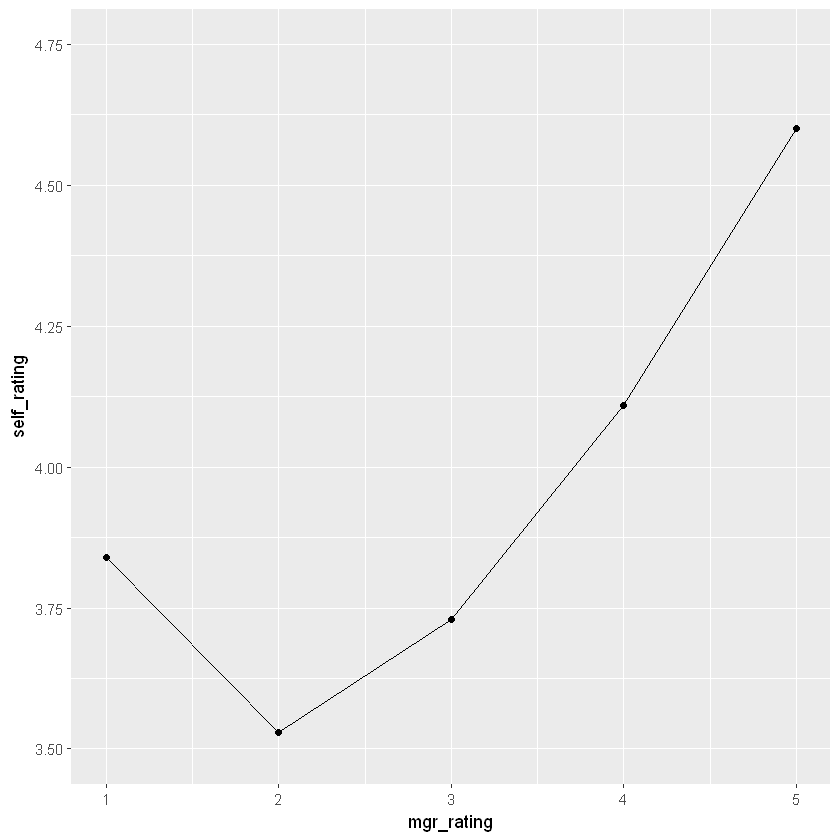

In [22]:
library(ggplot2)
# Basic line plot with points
ggplot(data=df2, aes(x=mgr_rating, y=self_rating, xlab = "Manager Rating", ylab = "Self Rating")) +
  geom_line()+
  geom_point() +
ylim(3.5, 4.75)

# Results

The Dunning-Kruger effect is present in the above data.  As a reminder, The Dunning-Kruger effect is a cognitive bias where low performers tend to overestimate their ability to perform a given task while high performers tend to underestimate it.

Regarding low performers - 101 employees with the lowest possible rating of "1" rated themselves on average 3.84.  This is higher then the next two groups (2 and 3) with average self-ratings of 3.54 and 3.74 respectively (Overestimate).

Regarding high performers - 4,967 employees with the highest possible rating of "5" rated themselves slightly lower at 4.60 on average (Underestimate).